<a href="https://colab.research.google.com/github/kobrue02/BENALI/blob/main/dataset_curation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import os
import xml.etree.ElementTree as ET
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Dataset Preparation

In [ ]:
drive_path = "/content/gdrive/MyDrive/NLI/"

## English Data

In [ ]:
!git clone https://github.com/masalha-alaa/native-language-recognition

Cloning into 'native-language-recognition'...
remote: Enumerating objects: 1905, done.
remote: Counting objects: 100% (233/233), done.
remote: Compressing objects: 100% (128/128), done.
remote: Total 1905 (delta 137), reused 193 (delta 105), pack-reused 1672 (from 1)
Receiving objects: 100% (1905/1905), 220.96 MiB | 22.91 MiB/s, done.
Resolving deltas: 100% (416/416), done.


In [ ]:
data_path = "/content/native-language-recognition/dataset 2021-05-16 16-56-59/sentences_not_shuffled"

In [ ]:
df_en = pd.DataFrame(columns=['sentence', 'l1', 'l2', 'source'])

In [ ]:
entries = []
for file in os.listdir(data_path):
    with open(os.path.join(data_path, file), 'r', encoding='utf-8') as f:
        lines = f.readlines()
        lines = [line.strip() for line in lines]
        labels = [file.split('.')[0]] * len(lines)
        for line, label in zip(lines, labels):
            entries.append(
              {'sentence': line,
                'l1': label,
                'l2': 'English',
                'source': "https://github.com/masalha-alaa/native-language-recognition"
              })
df_en = pd.concat([df_en, pd.DataFrame(entries)])
df_en.head()

,sentence,l1,l2,source
0,"Dear Germans,",Kazakhstan,English,https://github.com/masalha-alaa/native-languag...
1,If you're so concerned with human rights viola...,Kazakhstan,English,https://github.com/masalha-alaa/native-languag...
2,"Not really, I mean 75 years have passed",Kazakhstan,English,https://github.com/masalha-alaa/native-languag...
3,"On the contrary, I've heard a lot of positive ...",Kazakhstan,English,https://github.com/masalha-alaa/native-languag...
4,Isn't the company Voss owned by the Chinese now,Kazakhstan,English,https://github.com/masalha-alaa/native-languag...


## English Data PT 2

In [ ]:
!git clone https://github.com/tomelf/CNIT623-Native-Language-Identification-On-English-Learner-Dataset.git

Cloning into 'CNIT623-Native-Language-Identification-On-English-Learner-Dataset'...
remote: Enumerating objects: 1552, done.
remote: Total 1552 (delta 0), reused 0 (delta 0), pack-reused 1552 (from 1)
Receiving objects: 100% (1552/1552), 58.56 MiB | 14.75 MiB/s, done.
Resolving deltas: 100% (103/103), done.


In [ ]:
en2_data_path = "/content/CNIT623-Native-Language-Identification-On-English-Learner-Dataset/dataset/UD_English-ESL/fce-released-dataset/dataset"

In [ ]:
files = []
for dir in os.listdir(en2_data_path):
    for file in os.listdir(os.path.join(en2_data_path, dir)):
        files.append(os.path.join(en2_data_path, dir, file))

In [ ]:
def parse_xml_to_sentences(xml_content):
    """
    Using xml.etree.ElementTree - extracts text from coded_answer elements
    Uses ONLY the incorrect/original text from <i> tags, ignoring corrections
    """
    root = ET.fromstring(xml_content)

    language_elem = root.find('.//language')
    language = language_elem.text if language_elem is not None else "Unknown"

    for coded_answer in root.findall('.//coded_answer'):
        for ns in coded_answer.findall('.//NS'):
            # Find incorrect and correction elements
            incorrect = ns.find('./i')
            correction = ns.find('./c')

            if incorrect is not None:
                # Use only the incorrect text
                incorrect_text = ' '.join(incorrect.itertext())
                ns.clear()
                ns.text = incorrect_text
            elif correction is not None:
                continue

        # Get all text content after processing
        text_content = ' '.join(coded_answer.itertext())
        cleaned_text = ' '.join(text_content.split()).replace('  ', ' ')
        if cleaned_text:
            sentences = cleaned_text.split('. ')
            for sentence in sentences:
                yield language, sentence.strip() + "."

In [ ]:
data = []
for file in files:
    with open(file, 'r', encoding='utf-8') as f:
        xml_content = f.read()
        for language, text in parse_xml_to_sentences(xml_content):
            data.append({
                'sentence': text,
                'l1': language,
                'l2': 'English',
                'source': "https://github.com/tomelf/CNIT623-Native-Language-Identification-On-English-Learner-Dataset/blob/master/dataset/UD_English-ESL/fce-released-dataset/dataset/0100_2000_12/doc1000.xml",
                'word_count': len(text.split())
            })
df_en2 = pd.DataFrame(data)

In [ ]:
df_en2.head()

,sentence,l1,l2,source,word_count
0,Dear Mrs.,Catalan,English,https://github.com/tomelf/CNIT623-Native-Langu...,2
1,"Ryan, I'm writing to you replying First of all...",Catalan,English,https://github.com/tomelf/CNIT623-Native-Langu...,20
2,"Answering the second question , I would prefer...",Catalan,English,https://github.com/tomelf/CNIT623-Native-Langu...,15
3,"The reason is that, in my opinion, they are mo...",Catalan,English,https://github.com/tomelf/CNIT623-Native-Langu...,20
4,Providing that you give me the chance to chose...,Catalan,English,https://github.com/tomelf/CNIT623-Native-Langu...,20


## English PT 3

In [ ]:
!git clone https://github.com/Tejas-Nanaware/Native-Language-Identification/

Cloning into 'Native-Language-Identification'...
remote: Enumerating objects: 42, done.
remote: Counting objects: 100% (42/42), done.
remote: Compressing objects: 100% (35/35), done.
remote: Total 42 (delta 15), reused 25 (delta 5), pack-reused 0 (from 0)
Receiving objects: 100% (42/42), 3.72 MiB | 10.65 MiB/s, done.
Resolving deltas: 100% (15/15), done.


In [ ]:
en3_data_path = "/content/Native-Language-Identification/data"

In [ ]:
dfs = [pd.read_csv(os.path.join(en3_data_path, csv_file)) for csv_file in os.listdir(en3_data_path)]
df_raw = pd.concat(dfs)
df_raw.head()

,native_language,text
0,Japanese,"got an official job offer Today, I decided to ..."
1,Japanese,I am bum. I am bum.
2,Japanese,exam... I will have to take the exam tomorrow....
3,Japanese,Self-introduction and my situation I work in f...
4,Japanese,Tough Schedule Hi there. So tough schedule las...


In [ ]:
def preprocess_en3_df(df_raw):
    # strip all texts
    df_raw.text = df_raw.text.apply(lambda x: x.strip())
    # split texts into sentences (using ". ")
    df_raw.text = df_raw.text.apply(lambda x: x.split(". "))
    # explode the dataframe
    df_raw = df_raw.explode('text')
    # remove double spaces
    df_raw.text = df_raw.text.apply(lambda x: x.replace('  ', ' '))
    df_raw.text = df_raw.text.apply(lambda x: x.replace(' ,', ','))
    df_raw.text = df_raw.text.apply(lambda x: x.replace(' .', '.'))
    df_raw.text = df_raw.text.apply(lambda x: x.replace(' ;', ';'))
    # remove empty rows
    df_raw = df_raw[df_raw.text != '']
    return df_raw

df_en3 = preprocess_en3_df(df_raw)
df_en3.head()

,native_language,text
0,Japanese,"got an official job offer Today, I decided to ..."
0,Japanese,This company is developing Web services and I ...
0,Japanese,"When I go into the workforce, there would be s..."
0,Japanese,"I am little bit worrying about, but I can keep..."
0,Japanese,I want to be a person who can make efforts to ...


In [ ]:
df_en3["l2"] = "English"
df_en3["source"] = "https://github.com/Tejas-Nanaware/Native-Language-Identification/"
df_en3.rename(columns={'text': 'sentence', 'native_language': 'l1'}, inplace=True)
df_en3["word_count"] = df_en3.sentence.apply(lambda x: len(x.split()))
df_en3 = df_en3.reset_index(drop=True)
df_en3.head()

,l1,sentence,l2,source,word_count
0,Japanese,"got an official job offer Today, I decided to ...",English,https://github.com/Tejas-Nanaware/Native-Langu...,18
1,Japanese,This company is developing Web services and I ...,English,https://github.com/Tejas-Nanaware/Native-Langu...,15
2,Japanese,"When I go into the workforce, there would be s...",English,https://github.com/Tejas-Nanaware/Native-Langu...,14
3,Japanese,"I am little bit worrying about, but I can keep...",English,https://github.com/Tejas-Nanaware/Native-Langu...,14
4,Japanese,I want to be a person who can make efforts to ...,English,https://github.com/Tejas-Nanaware/Native-Langu...,16


In [ ]:
language_map = {
    "Russian": "Russia",
    "Vietnamese": "Vietnam",
    "Korean": "South Korea",
    "Thai": "Thailand",
    "Polish": "Poland",
    "Mandarin": "China",
    "Arabic": "Saudi Arabia",
    "Cantonese": "China",
    "Japanese": "Japan",
    "Spanish": "Spain",
    "French": "France",
    "Turkish": "Turkey",
    "Greek": "Greece",
    "Italian": "Italy",
    "German": "Germany",
    "Portuguese": "Portugal",
    "Catalan": "Spain",
    "Swedish": "Sweden",
    "Dutch": "Netherlands"
}

In [ ]:
en_dfs = pd.concat([df_en, df_en2, df_en3]).reset_index(drop=True)
en_dfs.l1 = en_dfs.l1.apply(lambda x: language_map.get(x, x))
en_dfs.head()

,sentence,l1,l2,source,word_count
0,"Dear Germans,",Kazakhstan,English,https://github.com/masalha-alaa/native-languag...,NaN
1,If you're so concerned with human rights viola...,Kazakhstan,English,https://github.com/masalha-alaa/native-languag...,NaN
2,"Not really, I mean 75 years have passed",Kazakhstan,English,https://github.com/masalha-alaa/native-languag...,NaN
3,"On the contrary, I've heard a lot of positive ...",Kazakhstan,English,https://github.com/masalha-alaa/native-languag...,NaN
4,Isn't the company Voss owned by the Chinese now,Kazakhstan,English,https://github.com/masalha-alaa/native-languag...,NaN


In [ ]:
len(en_dfs.index)

1628278

## Czech Data

In [ ]:
import xml.etree.ElementTree as ET

def parse_czesl_xml(xml_file_path):
    """
    Parse CZESL XML file and extract sentences with L1 language information.

    Args:
        xml_file_path (str): Path to the XML file

    Returns:
        list: List of dictionaries containing sentence data
    """
    # Parse the XML file
    tree = ET.parse(xml_file_path)
    root = tree.getroot()

    results = []

    # Iterate through all div elements
    for div in root.findall('.//div'):
        # Extract L1 language from div attributes
        l1_lang = div.get('s_L1', 'unknown')

        # Find all sentences in this div
        for sentence in div.findall('.//s'):
            sentence_id = sentence.get('id')

            # Concatenate all words in the sentence
            words = []
            for word_elem in sentence.findall('word'):
                word_text = word_elem.text
                if word_text:
                    words.append(word_text)

            # Join words to form complete sentence
            sentence_text = ' '.join(words)
            sentence_text = sentence_text.replace(' ,', ',')
            sentence_text = sentence_text.replace(' .', '.')
            sentence_text = sentence_text.replace(' ;', ';')
            sentence_text = sentence_text.replace(' :', ':')

            # Store the result
            if sentence_text.strip():  # Only add non-empty sentences
                results.append({
                    'sentence': sentence_text,
                    'l1': l1_lang,
                    'l2': 'Czech',
                    'source': "2014-czesl-sgt-en-all-v2"
                })

    return results

In [ ]:
data_path_cz = drive_path + "/Czech/2014-czesl-sgt-en-all-v2"

In [ ]:
cz_data = parse_czesl_xml(data_path_cz)
df_cz = pd.DataFrame(cz_data)

In [ ]:
df_cz.head()

,sentence,l1,l2,source
0,"Životní styl, kultura, služby v ČR a v me zemi",uk,Czech,2014-czesl-sgt-en-all-v2
1,Rozdíl životního stylu mězy Čechami a Ruskem j...,uk,Czech,2014-czesl-sgt-en-all-v2
2,"V minulem roku, když ještě jsem bydlila v Rusk...",uk,Czech,2014-czesl-sgt-en-all-v2
3,Také je ještě jedna duležitá příčina - ČR se n...,uk,Czech,2014-czesl-sgt-en-all-v2
4,To je velký zajímavý plus.,uk,Czech,2014-czesl-sgt-en-all-v2


## Slovenian Data

In [ ]:
def parse_tei_xml(xml_string):
    """
    Parse TEI XML string and extract sentences with FirstLang information.

    Args:
        xml_string (str): XML content as string

    Returns:
        list: List of dictionaries containing sentence data
    """
    # Handle namespace
    namespaces = {'tei': 'http://www.tei-c.org/ns/1.0'}

    # Parse the XML string
    root = ET.fromstring(xml_string)

    results = []

    # Find all div elements
    for div in root.findall('.//tei:div', namespaces):
        # Extract FirstLang from bibl notes
        first_lang = None
        bibl = div.find('.//tei:bibl', namespaces)
        if bibl is not None:
            for note in bibl.findall('tei:note', namespaces):
                if note.get('ana') == '#FirstLang':
                    first_lang = note.text
                    break

        if first_lang is None:
            first_lang = 'unknown'

        # Find all sentences in this div
        for sentence in div.findall('.//tei:s', namespaces):
            sentence_id = sentence.get('{http://www.w3.org/XML/1998/namespace}id')

            # Concatenate all words and punctuation in the sentence
            sentence_parts = []

            for elem in sentence:
                # Check if it's a word or punctuation element
                if elem.tag.endswith('}w') or elem.tag.endswith('}pc'):
                    if elem.text:
                        # Check for join attribute to handle spacing
                        join_attr = elem.get('join')
                        if join_attr == 'right':
                            # No space after this element
                            sentence_parts.append(elem.text)
                        else:
                            # Normal spacing
                            if sentence_parts:  # Add space before if not first element
                                sentence_parts.append(' ')
                            sentence_parts.append(elem.text)

            # Join to form complete sentence
            sentence_text = ' '.join(sentence_parts).strip()
            sentence_text = sentence_text.replace('  ', ' ')
            sentence_text = sentence_text.replace(' ,', ',')
            sentence_text = sentence_text.replace(' ,', ',')
            sentence_text = sentence_text.replace(' .', '.')
            sentence_text = sentence_text.replace(' ;', ';')
            sentence_text = sentence_text.replace(' :', ':')

            # Store the result
            if sentence_text:  # Only add non-empty sentences
                results.append({
                    'sentence': sentence_text,
                    'l1': first_lang,
                    'l2': 'Slovenian',
                    'source': 'Slovene learner corpus KOST 2.0'
                })

    return results

In [ ]:
data_path_sl = drive_path + "Slovenian/kost-orig.xml"

In [ ]:
sl_data = parse_tei_xml(open(data_path_sl).read())
df_sl = pd.DataFrame(sl_data)

In [ ]:
df_sl['l1'] = df_sl['l1'].str.split('[,/]')  # Split on comma or slash
df_sl = df_sl.explode('l1').assign(l1=lambda x: x['l1'].str.strip()).reset_index(drop=True)

In [ ]:
df_sl.head()

,sentence,l1,l2,source
0,"Včeraj, sem ugotovila da v svojo denarni...",makedonščina,Slovenian,Slovene learner corpus KOST 2.0
1,Se spomnim da nazadnje bila sem v banci...,makedonščina,Slovenian,Slovene learner corpus KOST 2.0
2,In moguče je da je sem pozabila na biro .,makedonščina,Slovenian,Slovene learner corpus KOST 2.0
3,"Prosim Vas, da čimprej mi izgotovite novo...",makedonščina,Slovenian,Slovene learner corpus KOST 2.0
4,Če rabite še informacije ali kakšen dokum...,makedonščina,Slovenian,Slovene learner corpus KOST 2.0


## Portuguese Data

In [ ]:
data_path_pl = drive_path + "Portuguese/"

In [ ]:
data_pl = []
for file in os.listdir(data_path_pl):
    if not file.endswith(".txt"):
        continue
    with open(os.path.join(data_path_pl, file), 'r', encoding='utf-8') as f:
        content = f.read()
        label = file[:2]
        for line in content.split("\n"):
            for sent in line.split(". "):
                txt = sent.strip()
                if txt:
                    data_pl.append({
                        'sentence': txt,
                        'l1': label,
                        'l2': 'Portuguese',
                        'source': "http://alfclul.clul.ul.pt/crpc/NLI-PT/"
                    })
df_pl = pd.DataFrame(data_pl)

In [ ]:
df_pl.head()

,sentence,l1,l2,source
0,Eu acordo às 7h e 45 min de manhã e daita-me à...,de,Portuguese,http://alfclul.clul.ul.pt/crpc/NLI-PT/
1,Tenho aulas de português todos os dias das 9h ...,de,Portuguese,http://alfclul.clul.ul.pt/crpc/NLI-PT/
2,Eu vai para na faculdade de letras na minha bi...,de,Portuguese,http://alfclul.clul.ul.pt/crpc/NLI-PT/
3,Eu como sempre ás 11h algo doce ao café e bebo...,de,Portuguese,http://alfclul.clul.ul.pt/crpc/NLI-PT/
4,Quando o curso de português acabar eu almoço à...,de,Portuguese,http://alfclul.clul.ul.pt/crpc/NLI-PT/


## Chinese

In [ ]:
zh_data_path = drive_path + "Chinese/"
df_zh = pd.read_csv(zh_data_path + "zh.csv")
df_zh["l2"] = "Chinese"
df_zh.head()

,sentence,l1,source,word_count,l2
0,难忘的一个人\n 我从出生到二十多岁都一直住在泰国。,Thailand,JCLCv2__Exam,28,Chinese
1,我二十三岁的时候有机会去英国一个月学习英语。,Thailand,JCLCv2__Exam,22,Chinese
2,**我在那边有一个难忘的小伙子，他是我的老师。,Thailand,JCLCv2__Exam,23,Chinese
3,在英国，我在一所华文学院学习英语。,Thailand,JCLCv2__Exam,17,Chinese
4,学校很小只有两*屋的楼房，不到十个的教室。,Thailand,JCLCv2__Exam,21,Chinese


## Combining the languages

In [ ]:
df = pd.concat([df_en, df_cz, df_sl, df_zh, df_pl])
df = df[~df["sentence"].isna()]
df = df[~df["l1"].isna()]
df = df.reset_index(drop=True)
df["word_count"] = df.sentence.apply(lambda x: len(x.split()))
df.head()

,sentence,l1,l2,source,word_count
0,"Dear Germans,",Kazakhstan,English,https://github.com/masalha-alaa/native-languag...,2
1,If you're so concerned with human rights viola...,Kazakhstan,English,https://github.com/masalha-alaa/native-languag...,19
2,"Not really, I mean 75 years have passed",Kazakhstan,English,https://github.com/masalha-alaa/native-languag...,8
3,"On the contrary, I've heard a lot of positive ...",Kazakhstan,English,https://github.com/masalha-alaa/native-languag...,40
4,Isn't the company Voss owned by the Chinese now,Kazakhstan,English,https://github.com/masalha-alaa/native-languag...,9


# Cleaning up labels

## Slovenian

In [ ]:
slovene_to_country = {
    'Makedonščina': 'North Macedonia',
    'Albanščina': 'Albania',
    'Bosanščina': 'Bosnia and Herzegovina',
    'Srbščina': 'Serbia',
    'Romunščina, Ruščina': 'Romania, Russia',
    'Romunščina': 'Romania',
    'Hrvaščina': 'Croatia',
    'Ruščina': 'Russia',
    'Srbo-Hrvaščina': 'Serbia/Croatia',
    'Črnogorščina': 'Montenegro',
    'Italijanščina': 'Italy',
    'Španščina (Argentinska)': 'Argentina',
    'Srbščina, Madžarščina': 'Serbia, Hungary',
    'Srbščina': 'Serbia',
    'Madžarščina': 'Hungary',
    'Španščina': 'Spain',
    'Poljščina': 'Poland',
    'Ukrajinščina': 'Ukraine',
    'Slovaščina': 'Slovakia',
    'Nizozemščina': 'Netherlands',
    'Japonščina': 'Japan',
    'Romunščina': 'Romania',
    'Češčina': 'Czech Republic',
    'Bolgarščina': 'Bulgaria',
    'Ruščina, Ukrajinščina': 'Russia, Ukraine',
    'Ruščina': 'Russia',
    'Ukrajinščina': 'Ukraine',
    'Madžarščina': 'Hungary',
    'Portugalščina': 'Portugal',
    'Nemščina': 'Germany',
    'Grščina': 'Greece',
    'Indonezijščina': 'Indonesia',
    'Hebrejščina': 'Israel',
    'Angleščina': 'United Kingdom/United States',
    'Kitajščina': 'China',
    'Slovenščina': 'Slovenia',
    'Ameriška Angleščina': 'United States',
    'Francoščina': 'France',
    'Italijanščina': 'Italy',
    'Italijanščina, Angleščina': 'Italy, United Kingdom/United States',
    'Italijanščina, Slovenščina': 'Italy, Slovenia',
    'Španščina, Slovenščina': 'Spain, Slovenia',
    'Argentinska Španščina': 'Argentina',
    'Kiruna': 'Sweden',  # Kiruna is a city in Sweden
    'Kirgiščina': 'Kyrgyzstan',
    'Poljščina, Francoščina': 'Poland, France',
    'Italijanščina, Nemščina': 'Italy, Germany',
    'Turščina': 'Turkey',
    'Češčina': 'Czech Republic',
    'Češčina, Nemščina': 'Czech Republic, Germany',
    'Korejščina': 'South Korea',
    'Ukrajinščina, Ruščina': 'Ukraine, Russia',
    'Švedščina': 'Sweden',
    'Igbo': 'Nigeria'
}

In [ ]:
df['l1'] = df['l1'].apply(lambda x: slovene_to_country.get(x.title(), x))

In [ ]:
df.head()

,sentence,l1,l2,source,word_count
0,"Dear Germans,",Kazakhstan,English,https://github.com/masalha-alaa/native-languag...,2
1,If you're so concerned with human rights viola...,Kazakhstan,English,https://github.com/masalha-alaa/native-languag...,19
2,"Not really, I mean 75 years have passed",Kazakhstan,English,https://github.com/masalha-alaa/native-languag...,8
3,"On the contrary, I've heard a lot of positive ...",Kazakhstan,English,https://github.com/masalha-alaa/native-languag...,40
4,Isn't the company Voss owned by the Chinese now,Kazakhstan,English,https://github.com/masalha-alaa/native-languag...,9


## Portuguese

In [ ]:
language_to_country = {
    "aa": "Eritrea",
    "ab": "Georgia",
    "ae": "Iran",
    "af": "South Africa",
    "ak": "Ghana",
    "am": "Ethiopia",
    "an": "Spain",
    "ar": "Saudi Arabia",
    "as": "India",
    "av": "Russia",
    "ay": "Bolivia",
    "az": "Azerbaijan",
    "ba": "Russia",
    "be": "Belarus",
    "bg": "Bulgaria",
    "bh": "India",
    "bi": "Vanuatu",
    "bm": "Mali",
    "bn": "Bangladesh",
    "br": "France",
    "bs": "Bosnia and Herzegovina",
    "ca": "Spain",
    "ce": "Russia",
    "ch": "Guam",
    "co": "France",
    "cr": "Canada",
    "cs": "Czech Republic",
    "cv": "Russia",
    "da": "Denmark",
    "de": "Germany",
    "dv": "Maldives",
    "dz": "Bhutan",
    "ee": "Ghana",
    "el": "Greece",
    "en": "United Kingdom",
    "eo": "None",
    "es": "Spain",
    "et": "Estonia",
    "eu": "Spain",
    "fa": "Iran",
    "ff": "Senegal",
    "fi": "Finland",
    "fj": "Fiji",
    "fo": "Faroe Islands",
    "fr": "France",
    "ga": "Ireland",
    "gl": "Spain",
    "gn": "Paraguay",
    "gv": "Isle of Man",
    "gu": "India",
    "ha": "Nigeria",
    "he": "Israel",
    "hi": "India",
    "ho": "Papua New Guinea",
    "hr": "Croatia",
    "ht": "Haiti",
    "hu": "Hungary",
    "hy": "Armenia",
    "hz": "Namibia",
    "ia": "None",
    "id": "Indonesia",
    "ie": "None",
    "ig": "Nigeria",
    "ii": "China",
    "ik": "United States",
    "io": "None",
    "is": "Iceland",
    "it": "Italy",
    "iu": "Canada",
    "ja": "Japan",
    "jv": "Indonesia",
    "ka": "Georgia",
    "kg": "Republic of the Congo",
    "ki": "Kenya",
    "kj": "Namibia",
    "kk": "Kazakhstan",
    "kl": "Greenland",
    "km": "Cambodia",
    "kn": "India",
    "ko": "South Korea",
    "kr": "Nigeria",
    "ks": "India",
    "ku": "Iraq",
    "kv": "Russia",
    "kw": "United Kingdom",
    "ky": "Kyrgyzstan",
    "la": "Vatican City",
    "lb": "Luxembourg",
    "lg": "Uganda",
    "li": "Netherlands",
    "ln": "Democratic Republic of the Congo",
    "lo": "Laos",
    "lt": "Lithuania",
    "lu": "Democratic Republic of the Congo",
    "lv": "Latvia",
    "mg": "Madagascar",
    "mi": "New Zealand",
    "mk": "North Macedonia",
    "ml": "India",
    "mn": "Mongolia",
    "mo": "Moldova",
    "mr": "India",
    "ms": "Malaysia",
    "mt": "Malta",
    "my": "Myanmar",
    "na": "Nauru",
    "nb": "Norway",
    "nd": "Zimbabwe",
    "ne": "Nepal",
    "ng": "Namibia",
    "nl": "Netherlands",
    "nn": "Norway",
    "no": "Norway",
    "nr": "South Africa",
    "ny": "Malawi",
    "oc": "France",
    "pl": "Poland",
    "pt": "Portugal",
    "ro": "Romania",
    "ru": "Russia",
    "rw": "Rwanda",
    "sh": "Saint Helena",
    "sk": "Slovakia",
    "sl": "Slovenia",
    "sq": "Albania",
    "sr": "Serbia",
    "sv": "Sweden",
    "sw": "None",
    "ta": "None",
    "te": "India",
    "tg": "Tajikistan",
    "th": "Thailand",
    "tk": "Turkmenistan",
    "tl": "Tagalog",
    "tr": "Turkey",
    "ts": "Tunisia",
    "ty": "United States",
    "ug": "Uganda",
    "uk": "United Kingdom",
    "ur": "Pakistan",
    "uz": "Uzbekistan",
    "vi": "Vietnam",
    "xal": "Oirat",
    "zh": "China"
}

In [ ]:
df['l1'] = df['l1'].apply(lambda x: language_to_country.get(x, x))

In [ ]:
df.l1.value_counts()

,count
l1,
Germany,154379
Netherlands,112900
Russia,94139
UK,83771
Indonesia,81739
...,...
Cameroon,5
Hong Kong,5
Pakistan,3


## English

In [ ]:
df["l1"] = df["l1"].apply(lambda x: {
    "UK": "United Kingdom",
    "US": "United States"
    }.get(x.upper(), x))
# split United Kingdom/United States
df["l1"] = df["l1"].apply(lambda x: x.split("/"))
df = df.explode("l1")

## Combining the subsets

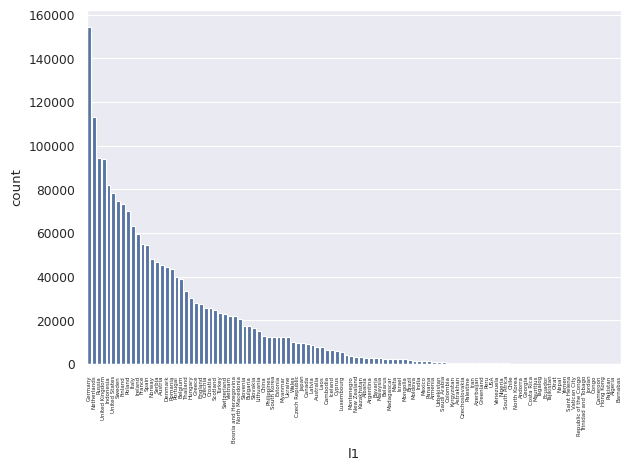

In [ ]:
sns.barplot(df["l1"].value_counts())
plt.xticks(rotation=90, fontsize=4)
plt.tight_layout()
plt.show()

# Preprocessing

## Data exploration

In [ ]:
# print the very long sentences
len(df[df.word_count > 100])

386

In [ ]:
df.l2.value_counts()

,count
l2,
English,1524000
Chinese,199851
Czech,111342
Slovenian,109349
Portuguese,12639


## Clean data

In [ ]:
# deduplicate
df = df.drop_duplicates(subset=['sentence'])

In [ ]:
# drop rows with any missing value
df = df.dropna()

In [ ]:
# drop short texts
df = df[df.word_count > 4]

In [ ]:
len(df.index)

812926

In [ ]:
df.l2.value_counts()

,count
l2,
English,618476
Slovenian,99478
Czech,82494
Portuguese,10836
Chinese,1642


In [ ]:
# rename USA
df["l1"] = df["l1"].apply(lambda x: "United States" if x == "USA" else x)
# unifiy czech
df["l1"] = df["l1"].apply(lambda x: "Czechia" if x == "Czech Republic" else x)
df["l1"] = df["l1"].apply(lambda x: "Czechia" if x == "Czechoslovakia" else x)

In [ ]:
print(df.l1.unique())
print(len(df.l1.unique()))

['Kazakhstan' 'France' 'Ukraine' 'Netherlands' 'Malta' 'Greece' 'Moldova'
 'Estonia' 'Portugal' 'India' 'Norway' 'Bosnia and Herzegovina'
 'Philippines' 'Czechia' 'Colombia' 'China' 'Germany' 'Sweden' 'Romania'
 'Denmark' 'Russia' 'Croatia' 'Ireland' 'Brazil' 'Belarus' 'Poland'
 'Argentina' 'United Kingdom' 'Canada' 'United States' 'Scotland' 'Serbia'
 'Switzerland' 'Cyprus' 'Japan' 'Israel' 'Iran' 'Bulgaria' 'Palestine'
 'Hungary' 'Belgium' 'Slovakia' 'Andorra' 'Austria' 'Australia' 'Mexico'
 'Iceland' 'Spain' 'Chile' 'Slovenia' 'Armenia' 'England' 'Luxembourg'
 'Albania' 'Latvia' 'Turkey' 'Wales' 'Lithuania' 'Astrakhan' 'Greenland'
 'Bavaria' 'Finland' 'New Zealand' 'Italy' nan 'Kyrgyzstan' 'South Korea'
 'Saudi Arabia' 'Vietnam' 'Mongolia' 'Uzbekistan' 'Azerbaijan' 'Thailand'
 'Saint Helena' 'Tajikistan' 'Tagalog' 'North Macedonia'
 'Republic of the Congo' 'Georgia' 'Oirat' 'Indonesia' 'Vatican City'
 'Malaysia' 'Montenegro' 'Nigeria' 'Panama' 'Cambodia' 'Peru' 'Laos'
 'Myanmar' 'Ma

In [ ]:
df.to_csv("dataset_raw.csv", index=False)

In [ ]:
df = pd.read_csv("dataset_raw.csv", index_col=0, nrows=None, low_memory=False)

## Start from here if you have the raw data csv

In [ ]:
raw_df = pd.read_csv("nli_train.csv", nrows=None, low_memory=False)

In [ ]:
# train_df = pd.read_csv("nli_train.csv")
df = raw_df.copy()
len(df.index)

674326

In [ ]:
df.columns

Index(['sentence', 'l1'], dtype='object')

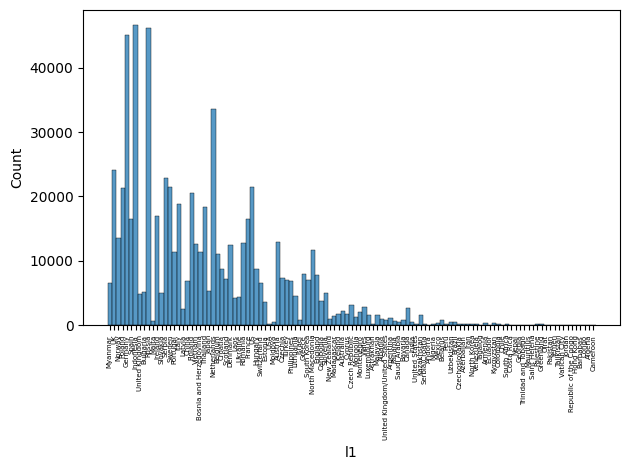

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# l1 histplot with rotated xticks
def dist(df):
    ax = sns.histplot(df, x="l1", multiple="layer")
    plt.xticks(rotation=90)
    plt.xticks(fontsize=5)
    plt.tight_layout()
    plt.show()
dist(df)